In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob

#import the "canonical" cosmologies from the pre-written astropy package
from astropy.cosmology import FlatLambdaCDM, FlatwCDM
#integrate package
from scipy.integrate import quad

In [7]:
freew = True

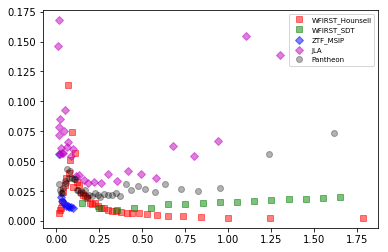

In [8]:
#load all the SN mock datasets
#This will give a sense for the ranges of redshifts looked at and at which redshifts to calculate the distances
#It also gives an idea for which regions of redshift space are best covered by which surveys

wfirst_hounsell = np.loadtxt('data/lcparam_WFIRST_G10.txt', usecols=(1,5), skiprows=1) #a future high-redshift survey (one kind of simulation)
wfirst_sdt = np.loadtxt('data/wfirst_sdt.dat', usecols=(0,1), skiprows=1) #a future high-redshift survey (another kind of simulation)
ztf_msip = np.loadtxt('data/ztf_msip.dat', usecols=(0, 1),  skiprows=1) #a future low-redshift survey
jla = np.loadtxt('data/jla.dat', usecols=(0, 1), skiprows=1) #current high-redshift catalog
pantheon = np.loadtxt('data/lcparam_DS17f.txt', usecols=(1,5), skiprows=1)  #current high-redshift catalog
plt.figure(1)
plt.plot(wfirst_hounsell[:,0], wfirst_hounsell[:,1], 'rs', label='WFIRST_Hounsell', alpha=.5)
plt.plot(wfirst_sdt[:,0], wfirst_sdt[:,1], 'gs', label='WFIRST_SDT', alpha=.5)
plt.plot(ztf_msip[:,0], ztf_msip[:,1], 'bD', label='ZTF_MSIP', alpha=.5)
plt.plot(jla[:,0], jla[:,1], 'mD', label='JLA', alpha=.5)
plt.plot(pantheon[:,0], pantheon[:,1], 'ko', label='Pantheon', alpha=.3)

plt.legend(loc=0, prop={'size':7})
plt.savefig('sne_errors.pdf')
plt.show()
plt.cla()

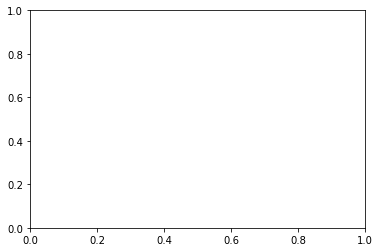

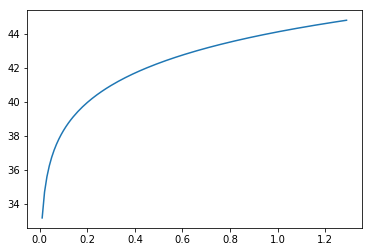

In [9]:
#calculating distances
if freew:
    cosmo = FlatwCDM(70, 0.3, w0=-1.)
else:
    cosmo = FlatLambdaCDM(70, 0.3)
zz = np.arange(jla[:,0].min(), jla[:,0].max(), 0.01)
LD_MPC = cosmo.luminosity_distance(zz).value
mu_sn = 5*np.log10(LD_MPC)+25
plt.figure(2)
plt.plot(zz, mu_sn)
plt.show()

In [11]:
#using individual density parameters to reproduce above figure
def Om(z, OM):
    return OM*(1+z)**3.

def Or(z, h0, omega_gam = 2.469e-5, neff= 3.04):
    h = h0/100.
    omega_rad = omega_gam*(1+0.2271*neff)*h**-2.
    return omega_rad*(1+z)**4.

def Olam(z, lam):
    return lam

def Ok(z, ok):
    return ok*(1+z)**2.

def ez(z, OM, lam, h0):
    ok = 1 - OM - lam
    matter_term = Om(z, OM)
    radiation_term = Or(z, h0)
    lam_term = Olam(z, lam)
    curv_term = Ok(z, ok)
    
    ez2 = matter_term + radiation_term + curv_term + lam_term 
    return np.sqrt(ez2)

def ez_for_int(z, OM, lam, h0):
    forint = 1./(z, OM, lam, h0)
    return forint

def luminosity_distance(z, OM, lam,h0, log=True):
    out = np.empty_like(z)
    for i, zval in enumerate(z):
        out[i] = quad(ez_for_int, 0., zval, args=(OM, lam, h0))[0]
    dl_mpc = c*(1+z)*out/h0
    if log:
        return 5*np.log10(dl_mpc)+25
    else:
        return dl_mpc
    
def angular_diameter_distance(z, OM, lam,h0):
    dl = luminosity_distance(z, OM, lam, h0, log=False)
    return dl/(1+z)**2.
    

In [12]:
#plot different densities
#TODO:
#make density as a function of redshift for matter, radiation and lambda.
#redshift range 1: z = {0 - 5}
#"" "" 2: z = 10 - 1000 (in logspace)
#plot luminosity distance and angular diameter distance
#for z = (0 - 1000) in logspace
